In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.api import ExponentialSmoothing
import numpy as np
from google.colab import files


In [ ]:
# Function to upload a file
def upload_file():
    print("Please upload an Excel or CSV file.")
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    if file_name.endswith('.xlsx'):
        df = pd.ExcelFile(file_name).parse(sheet_name=0)
    elif file_name.endswith('.csv'):
        df = pd.read_csv(file_name)
    else:
        raise ValueError("Unsupported file format. Please upload an Excel (.xlsx) or CSV (.csv) file.")
    return df


In [ ]:
# Advanced Data Analysis
def data_analysis(df):
    print("Dataset Overview:\n", df.head())
    print("\nData Types:\n", df.dtypes)
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nSummary Statistics:\n", df.describe())

    # Visualizations
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Category', y='Total Amount', data=df, ci=None)
    plt.title("Total Amount by Category")
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(12, 6))
    df.groupby('Date')['Total Amount'].sum().plot()
    plt.title("Total Sales Over Time")
    plt.ylabel("Total Amount")
    plt.xlabel("Date")
    plt.grid()
    plt.show()


In [ ]:
# Preprocessing
def preprocess_data(df):
    # Handle missing values
    df.fillna(method='ffill', inplace=True)

    # Convert date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Encode categorical columns
    label_encoders = {}
    for col in ['Product', 'Category', 'Size']:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    return df, label_encoders

In [ ]:
# Feature Engineering
def feature_engineering(df):
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
    return df


In [ ]:
# Time Series Forecasting
def time_series_forecasting(df):
    time_series_data = df.groupby('Date')['Total Amount'].sum()
    model = ExponentialSmoothing(time_series_data, trend="add", seasonal="add", seasonal_periods=7)
    fitted_model = model.fit()

    forecast = fitted_model.forecast(steps=7)

    plt.figure(figsize=(12, 6))
    plt.plot(time_series_data.index, time_series_data.values, label="Actual Sales")
    plt.plot(forecast.index, forecast.values, label="Forecasted Sales", color="red")
    plt.title("Sales Forecasting")
    plt.legend()
    plt.grid()
    plt.show()
    return forecast

Please upload an Excel or CSV file.


Saving Sold Product Report.xlsx to Sold Product Report.xlsx


<ipython-input-10-ee751b856e39>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Dataset Overview:
         Date     Invoice No.       Contact  Product  Category  Size  Quantity  \
0 2024-12-26   2612202414943  1.521430e+09      223         7     3         1   
1 2024-12-24    241220241666  1.712622e+09       45         0     7         1   
2 2024-12-24    241220241654  1.709938e+09       40         0     4         1   
3 2024-12-24  24122024154322  1.770354e+09       54         1     5         1   
4 2024-12-24  24122024154322  1.770354e+09       18         6     5         1   

    Price  Total Amount  Paid Amount  Month  Year  DayOfWeek  IsWeekend  
0  2350.0          2350       2232.5     12  2024          3          0  
1  1850.0          1850       1500.0     12  2024          1          0  
2  1850.0          1850       1400.0     12  2024          1          0  
3  1350.0          1350       1300.0     12  2024          1          0  
4  1350.0          1350       1300.0     12  2024          1          0  

Data Types:
 Date            datetime64[ns]
Invoi

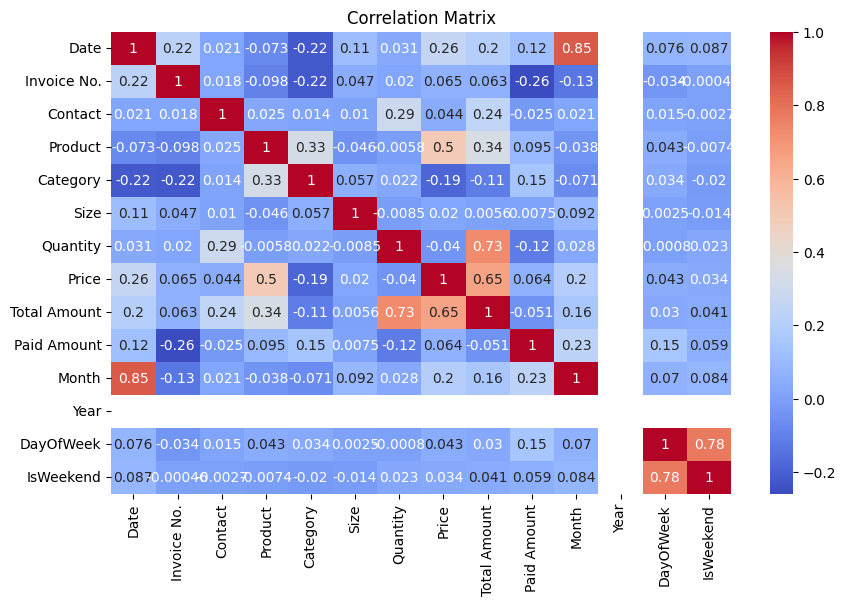

<ipython-input-9-d7a360167324>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Total Amount', data=df, ci=None)


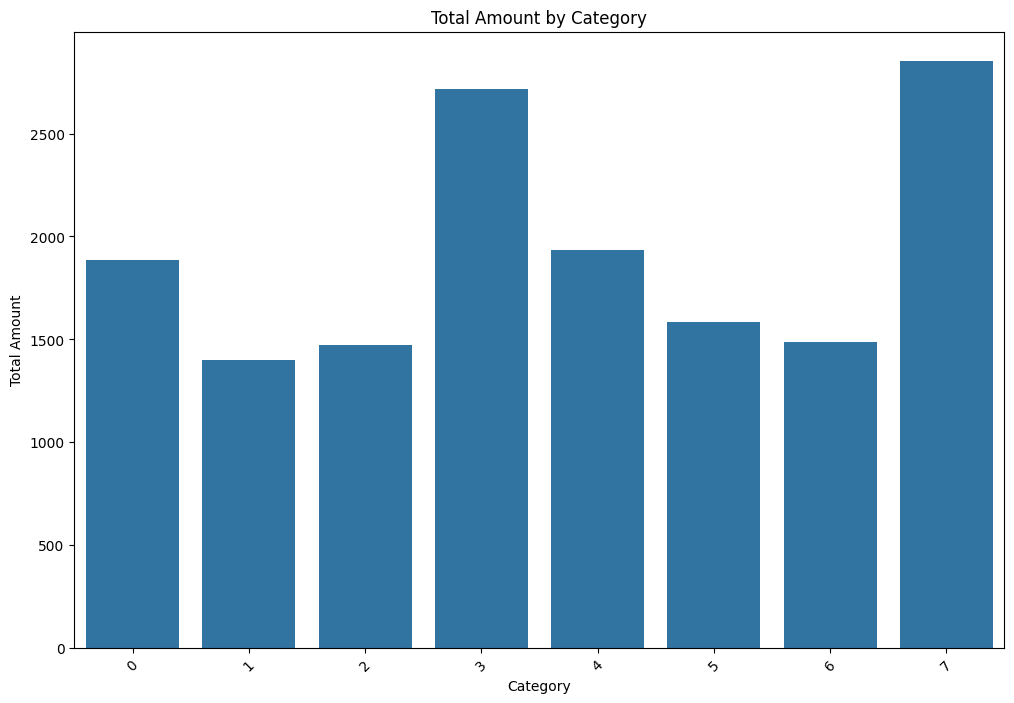

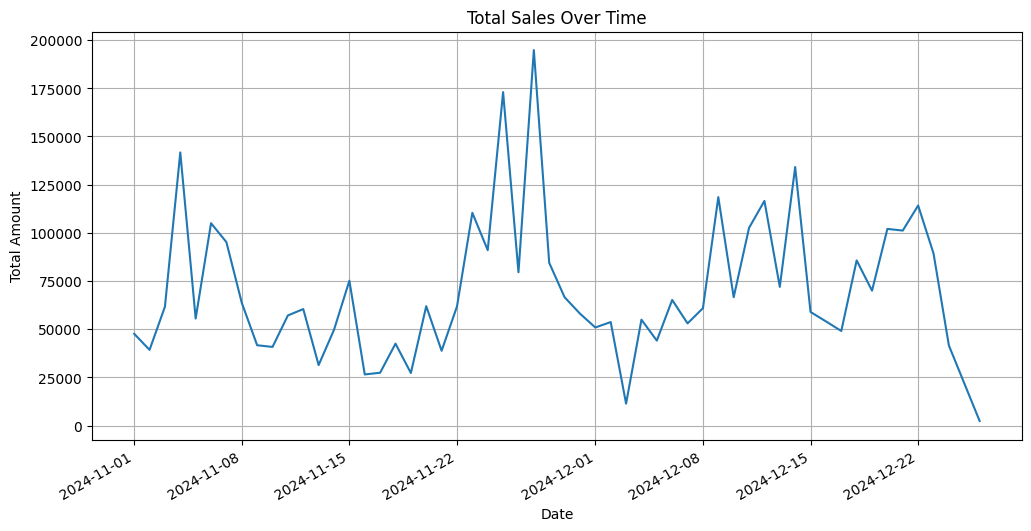

Random Forest Model Evaluation:
RMSE: 49.2005875366696
R2 Score: 0.9902340887442472


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


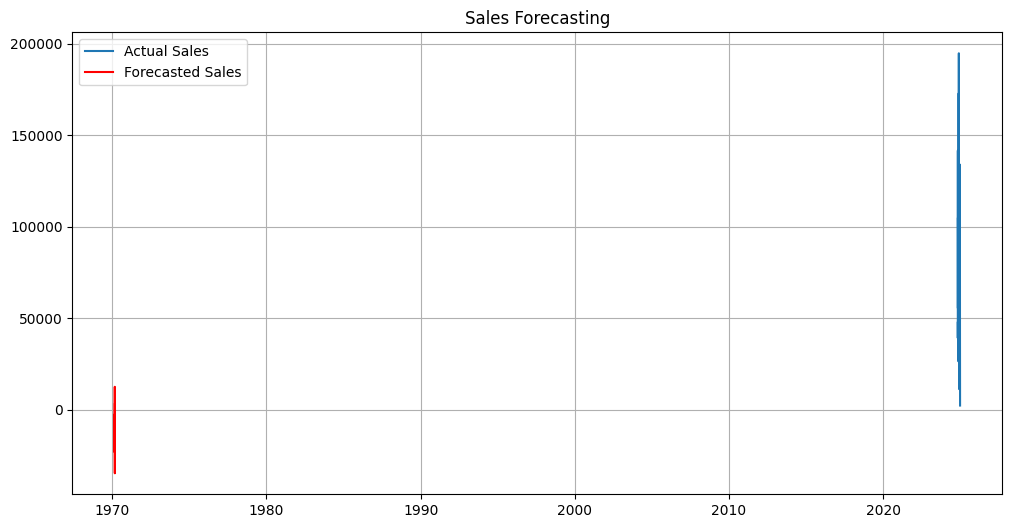

In [ ]:
# Main execution
if __name__ == "__main__":
    df = upload_file()

    df_cleaned, label_encoders = preprocess_data(df)
    df_featured = feature_engineering(df_cleaned)

    data_analysis(df_featured)

    X = df_featured[['Product', 'Category', 'Size', 'Price', 'Quantity', 'Month', 'Year', 'DayOfWeek', 'IsWeekend']]
    y = df_featured['Total Amount']

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Random Forest Regressor
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)

    # Evaluate Random Forest Model
    print("Random Forest Model Evaluation:")
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
    print("R2 Score:", r2_score(y_test, y_pred_rf))

    # Time Series Forecasting
    forecast = time_series_forecasting(df_featured)
